<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../DATA/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [3]:
# ANSWER
house['price']

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

#### 2.2 List all possible variables which might be Predictor variable.

In [4]:
# ANSWER
house[[
    'street',
    'city',
    'sq__ft',
    'type',
    'beds',
    'baths'
]]

,street,city,sq__ft,type,beds,baths
0,3526 HIGH ST,SACRAMENTO,836,Residential,2,1
1,51 OMAHA CT,SACRAMENTO,1167,Residential,3,1
2,2796 BRANCH ST,SACRAMENTO,796,Residential,2,1
3,2805 JANETTE WAY,SACRAMENTO,852,Residential,2,1
4,6001 MCMAHON DR,SACRAMENTO,797,Residential,2,1
...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,2280,Residential,4,3
981,6932 RUSKUT WAY,SACRAMENTO,1477,Residential,3,2
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,1216,Residential,3,2
983,8304 RED FOX WAY,ELK GROVE,1685,Residential,4,2


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [5]:
# ANSWER
house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [6]:
house['sq__ft'].corr(house['price'])

0.33389695540617675

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [7]:
house.loc[73, ['beds', 'baths', 'sq__ft']] = [3,3, 1665]
house.loc[89, ['beds', 'baths', 'sq__ft']] = [3,3, 1473]
house.loc[100, ['beds', 'baths', 'sq__ft']]  = [4, 2, 1713]
house.loc[121, ['beds', 'baths', 'sq__ft']] = [4, 2.5, 2536]
house.loc[126, ['beds', 'baths', 'sq__ft']] = [3, 2.5, 1842]
house.loc[901, ['beds', 'baths', 'sq__ft']] = [1, 1.5, 1065]
house.loc[917, ['beds', 'baths', 'sq__ft']] = [4,2, 1917]
house.loc[934, ['beds', 'baths', 'sq__ft']] = [1, 1.5, 1194]
house.loc[947, ['beds', 'baths', 'sq__ft']] = [2, 1, 1050]
house.loc[970, ['beds', 'baths', 'sq__ft']] = [3, 2.5, 1665]




In [8]:
# ANSWER
x = house['sq__ft'].values.reshape(-1,1)
y = house['price'].values.reshape(-1,1)
# y = house['price']
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [9]:
y_pred = reg.predict(x)

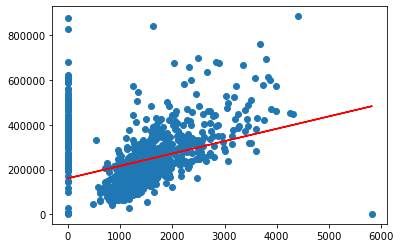

In [10]:
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'red')
plt.show()

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [11]:
# ANSWER
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [12]:
residuals = y - y_pred
residuals = abs(residuals)
print('The residuals are ', residuals)

The residuals are  [[1.47468491e+05]
 [1.56826007e+05]
 [1.35593268e+05]
 [1.38270380e+05]
 [1.22628699e+05]
 [1.32622632e+05]
 [1.30650882e+05]
 [1.34590313e+05]
 [1.17605700e+05]
 [1.24936965e+05]
 [1.10427922e+05]
 [1.25550536e+05]
 [1.01778560e+05]
 [1.09387714e+05]
 [1.08250576e+05]
 [1.12508799e+05]
 [9.38709352e+04]
 [8.81678376e+04]
 [7.29437110e+04]
 [1.13884384e+05]
 [1.00321910e+05]
 [1.11335758e+05]
 [1.06084438e+05]
 [1.24994872e+05]
 [8.52934773e+04]
 [9.40189927e+04]
 [8.64491723e+04]
 [9.33773402e+04]
 [1.05644717e+05]
 [9.75278828e+04]
 [8.49428951e+04]
 [8.96515488e+04]
 [1.00344717e+05]
 [8.34610485e+04]
 [7.69428951e+04]
 [9.27010786e+04]
 [7.30184093e+04]
 [9.31943290e+04]
 [7.42809654e+04]
 [5.24777679e+04]
 [8.06319944e+04]
 [7.32552297e+04]
 [6.19892147e+04]
 [5.69146173e+04]
 [8.68188438e+04]
 [5.84327707e+04]
 [8.29308299e+04]
 [1.02360291e+05]
 [8.57865527e+04]
 [7.42214819e+04]
 [5.62020490e+04]
 [7.54851355e+04]
 [6.71954540e+04]
 [8.10455254e+04]
 [4.75557

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

In [13]:
y_pred

array([[206690.49072254],
       [225038.00720246],
       [204473.2681872 ],
       [207577.37973668],
       [204528.69875059],
       [222543.6318502 ],
       [221545.8817093 ],
       [225592.31283629],
       [212510.6998778 ],
       [223873.9653714 ],
       [210736.92184953],
       [231800.53593524],
       [208630.56044096],
       [216889.71438509],
       [217000.57551186],
       [223208.7986108 ],
       [207133.93522961],
       [204417.83762382],
       [192943.71100345],
       [235514.38368193],
       [222321.90959667],
       [234017.75847057],
       [229084.43832945],
       [249094.87171087],
       [210293.47734246],
       [220658.99269517],
       [213730.17227224],
       [222377.34016005],
       [236844.71720313],
       [229527.88283651],
       [217942.89508938],
       [224206.54875171],
       [236844.71720313],
       [222211.0484699 ],
       [217942.89508938],
       [238951.0786117 ],
       [220326.40931487],
       [241944.3290344 ],
       [2238

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [14]:
# ANSWER
x = house[['sq__ft']].values.reshape(-1,1)
y = house['price'].values.reshape(-1,1)

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [15]:
# ANSWER
x_mean = np.mean(x)
y_mean = np.mean(y)
numerical = np.sum((y - y_mean)*(x - x_mean))
denum = np.sum((x-x_mean)**2)
beta_1 = numerical/denum
print('Beta 1 is ', beta_1)

Beta 1 is  55.430563383430176


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [16]:
# ANSWER

beta_0 = y_mean - (beta_1*x_mean)
print('Beta 0 is ', beta_0)

Beta 0 is  160350.53973399394


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [17]:
# ANSWER
y_hat = beta_0 +( beta_1*x)
print('Y hat is ', y_hat)

Y hat is  [[206690.49072254]
 [225038.00720246]
 [204473.2681872 ]
 [207577.37973668]
 [204528.69875059]
 [222543.6318502 ]
 [221545.8817093 ]
 [225592.31283629]
 [212510.6998778 ]
 [223873.9653714 ]
 [210736.92184953]
 [231800.53593524]
 [208630.56044096]
 [216889.71438509]
 [217000.57551186]
 [223208.7986108 ]
 [207133.93522961]
 [204417.83762382]
 [192943.71100345]
 [235514.38368193]
 [222321.90959667]
 [234017.75847057]
 [229084.43832945]
 [249094.87171087]
 [210293.47734246]
 [220658.99269517]
 [213730.17227224]
 [222377.34016005]
 [236844.71720313]
 [229527.88283651]
 [217942.89508938]
 [224206.54875171]
 [236844.71720313]
 [222211.0484699 ]
 [217942.89508938]
 [238951.0786117 ]
 [220326.40931487]
 [241944.3290344 ]
 [223873.9653714 ]
 [202477.7679054 ]
 [232631.99438599]
 [227255.22973779]
 [218885.2146669 ]
 [218164.61734291]
 [248318.8438235 ]
 [222432.77072344]
 [247930.82987981]
 [268717.2911486 ]
 [252143.55269695]
 [242221.48185132]
 [226202.04903351]
 [248485.13551365]
 [

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [18]:
# ANSWER
residual = y - y_hat
print('Residuals are ', abs(residual))

Residuals are  [[1.47468491e+05]
 [1.56826007e+05]
 [1.35593268e+05]
 [1.38270380e+05]
 [1.22628699e+05]
 [1.32622632e+05]
 [1.30650882e+05]
 [1.34590313e+05]
 [1.17605700e+05]
 [1.24936965e+05]
 [1.10427922e+05]
 [1.25550536e+05]
 [1.01778560e+05]
 [1.09387714e+05]
 [1.08250576e+05]
 [1.12508799e+05]
 [9.38709352e+04]
 [8.81678376e+04]
 [7.29437110e+04]
 [1.13884384e+05]
 [1.00321910e+05]
 [1.11335758e+05]
 [1.06084438e+05]
 [1.24994872e+05]
 [8.52934773e+04]
 [9.40189927e+04]
 [8.64491723e+04]
 [9.33773402e+04]
 [1.05644717e+05]
 [9.75278828e+04]
 [8.49428951e+04]
 [8.96515488e+04]
 [1.00344717e+05]
 [8.34610485e+04]
 [7.69428951e+04]
 [9.27010786e+04]
 [7.30184093e+04]
 [9.31943290e+04]
 [7.42809654e+04]
 [5.24777679e+04]
 [8.06319944e+04]
 [7.32552297e+04]
 [6.19892147e+04]
 [5.69146173e+04]
 [8.68188438e+04]
 [5.84327707e+04]
 [8.29308299e+04]
 [1.02360291e+05]
 [8.57865527e+04]
 [7.42214819e+04]
 [5.62020490e+04]
 [7.54851355e+04]
 [6.71954540e+04]
 [8.10455254e+04]
 [4.75557573e

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [19]:
# ANSWER
ss_res = np.sum((y - y_mean)**2)
ss_tot = np.sum((y - y_hat)**2)

r_square = 1 - (ss_res/ss_tot)
print(r_square)

-0.1291318136451014


##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [20]:
# ANSWER

def draw_plot(X, Y, Yhat):
    ### plot the data
    # create a figure
    fig = plt.figure(figsize = (15, 9) )
    # get the axis of that figure
    ax = plt.gca()
    
    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c = 'b')
    ax.plot(X, Yhat, color = 'r')
    
    plt.show();

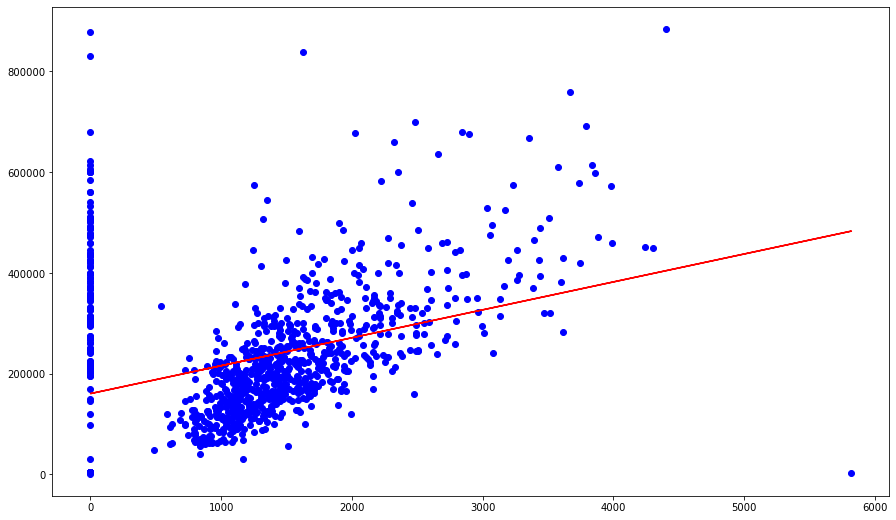

In [21]:
draw_plot(x, y, y_hat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [22]:
house['y_hat'] = y_hat

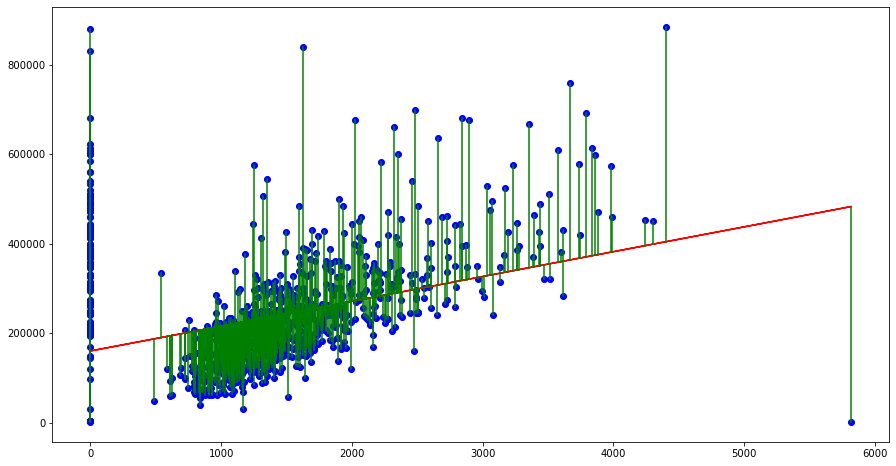

In [23]:
# ANSWER


fig = plt.figure(figsize = (15, 7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x = x, y = y, c = 'b')
ax.plot(x, y_hat, color = 'r')

# iterate over predictions
for _, row in house.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['y_hat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [24]:
# ANSWER
reg.predict(x[930].reshape(-1,1))

array([[227088.93804764]])



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



